## Raytracing a Schwarzchild Black Hole
This question is based on: https://rantonels.github.io/starless/

### Raytracing

We see physical objects when photons from sources of light travel along some path, possibly bouncing and scattering along the way before entering our eyes and forming an image on our retinas. 

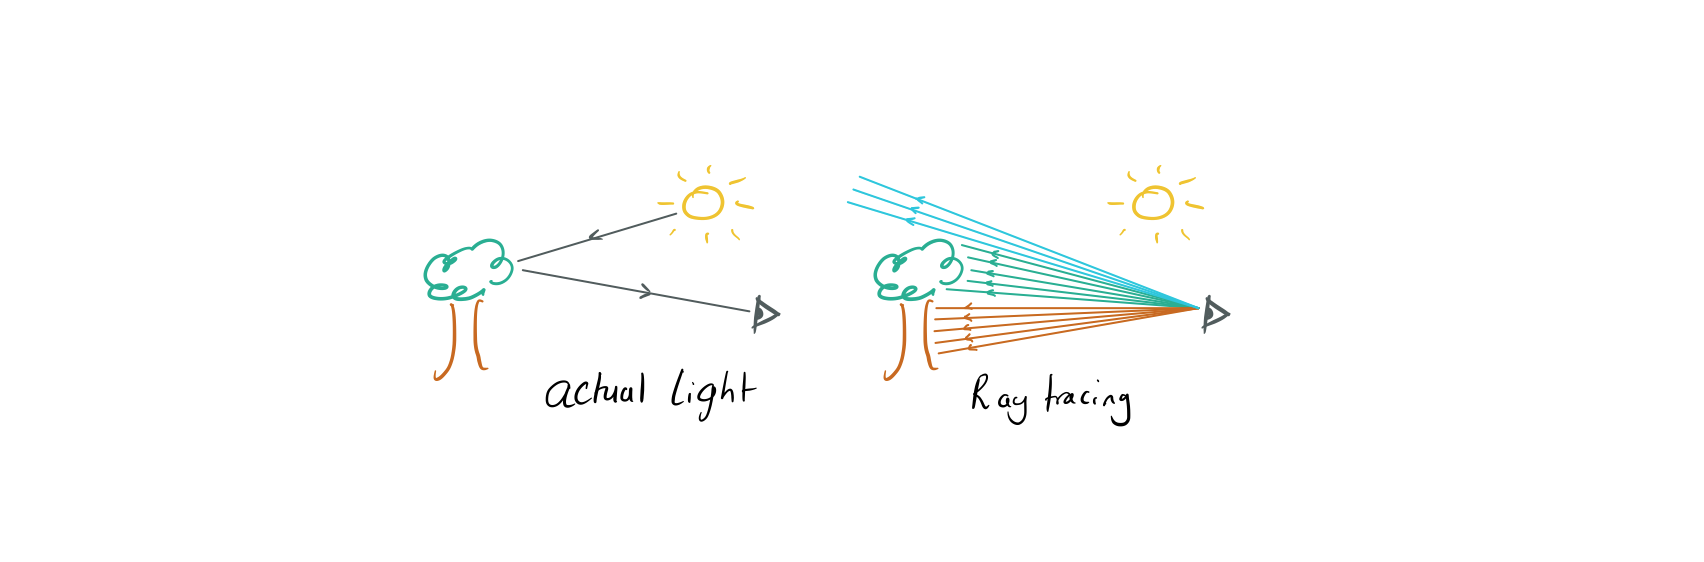

Raytracing is a method for rendering images that does this in reverse, for each pixel in the image we shoot a light ray out of a point at a different angle. By calculating what that ray intersects with we can decide how to colour that pixel. 

In non-relativistic settings these rays are just straight lines, maybe bouncing off surfaces sometimes, but in GR we need to calculate the full geodesic of the ray. By doing this we will be able to produce simple schematic images of the distortions created by a black hole. 

### The coding

In this problem set we're going to be working towards raycasting these schematic images of a Schwarzchild black hole. 

The code will become a little involved as we work towards the payoff but I've tried to break it down into maneagble chunks. 

If you get stuck, I've provided some hints with the idea that you should check them one at a time, and between each give yourself some time to try to arrive at the solution. It's likely that everyone will get a bit stuck at some point along the way so it's ok to sometimes take a peak at the answer to the part you're stuck on.

Once you're done with a question, check the answer before moving onto the next part.

### Question 1
The  Schwarzchild metric is
$$ds^2 = (1 - \tfrac{r_s}{r}) dt^2 - (1 - \tfrac{r_s}{r})^{-1} dr^2 - r^2 d\theta^2 - r^2 sin^2 \theta d\phi^2$$

Where $r,\phi,\theta$ are our spherical polar coordinates and $r_s$ is the radius of the event horizon which we will mostly set to 1 for what followds. However it's useful to leave it in the numerics because $r_s = 0$ corresponds to the flat spacetime. This is also a useful way to debug your code, when $r_s = 0$$r_s = 0$ all your geodesics should be straight and you can do normal geometry on them.

Prove that for a photon travelling through the Schwarzchild metric in the $\theta = \pi / 2$ plane, we can eliminate $t$ in the geodesic equation to arrive at a differential equation for $r(\phi)$:

$$\tfrac{dr}{d\phi}^2 = a r^4 - (1 - r_s/r)(b r^4 + r^2)$$
for some constants $a$ and $b$.

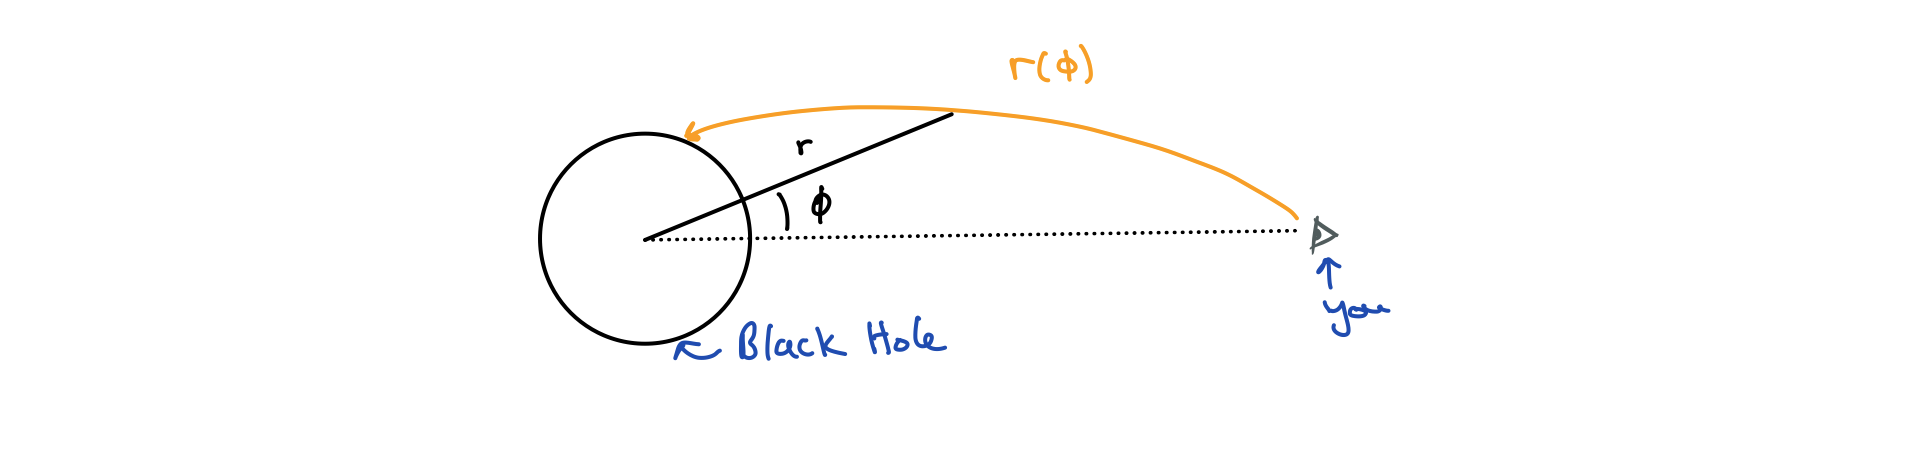

### Question 2
i) Recall that a 2nd order differential equation contains only derivatives like $\ddot{u}$ and $\dot{u}$ while a first order diff. eqn contains only terms like $\dot{u}$. Show that $\ddot{u} = -u (1 - \tfrac{3}{2} r_s u)$ can be written as two coupled first order equations by introducing a second variable.

ii) Read the documentation for `scipy.integrate.solve_ivp`, can you figure out how part i) helps us to use `solve_ivp` on our problem?

### Question 3
i) First write a function `geodesic(u, udot, phi_max)` using that takes initial conditions $(u_0, \dot{u}_0)$ and returns a trajectory $u(\phi)$ represented by a numpy array of $\phi$ values and one of $u$ values with $\phi$ between 0 and `phi_max`.

ii) Now write a function `phi_u_to_xy(phi, u)` that transforms from $(u, \phi)$ coordinates to (x,y) coordinates.

iii) Plot a trajectory in $x,y$ space starting from $u = 2/3, \dot{u} = 2/9$ for phi. If all goes well you'll get a somewhat polygonal looking trajectory starting at $(x,y) = (1,0)$ and ending at $(0,0)$. 

iv) Reduce the maximum step size to something more reasonable like 0.2 to get a smoother plot. 

### Hints for 3
1. Use scipy.integrate.solve_ivp
1. Read the docs for scipy.integrate.solve_ivp
1. Note that solve_ivp solves the equation dy/dt = f(y,t) where y may be an vector.

### Question 4
i) Note that the point $u = 0$ corresponds to $r = \infty$, so it makes sense to stop the simulation at $u = 0$ because physically it means the photon has completely escaped the black hole and has shot off into space. Search the docs for `solve_ivp` for a way to implement this early stopping. If you don't do this you will notice spurious solutions later where $u$ has gone past 0 to small negative values. You'll notice that you actually get some spurious solutions anway when u gets very small so instead of stopping the simulation at $u = 0$ stop it at some large value like $r = 100$ (Don't forget $r = 1/u$).

ii) Write a function `r_rdot_to_u_udot(r, rdot)` that converts from $(r, \dot{r})$ to $(u, \dot{u})$

iii) Use the above to plot geodesics with the initial values $r = 3/2$ and $\dot{r}$ ranging between $-1$ and $0.1$
iv) Do another for $r = 3$ and $\dot{r}$ ranging between $-3$ and $-1$ but feel free to play around with the values. 

Once you get the plots from iii you'll see that the photons either fall into the singularity or escape to infinity depending on their initial conditions, the two regimes are separated by an unstable circular orbit called the photon sphere that lies at $r = \tfrac{3}{2}r_s$

### Question 5

i) We started off with $(\dot{u}, u)$ initial conditions and then moved to using $(\dot{r}, r)$. Now define $(\alpha, r)$ where $\alpha$ is the angle between the rays tangent and the horizontal.
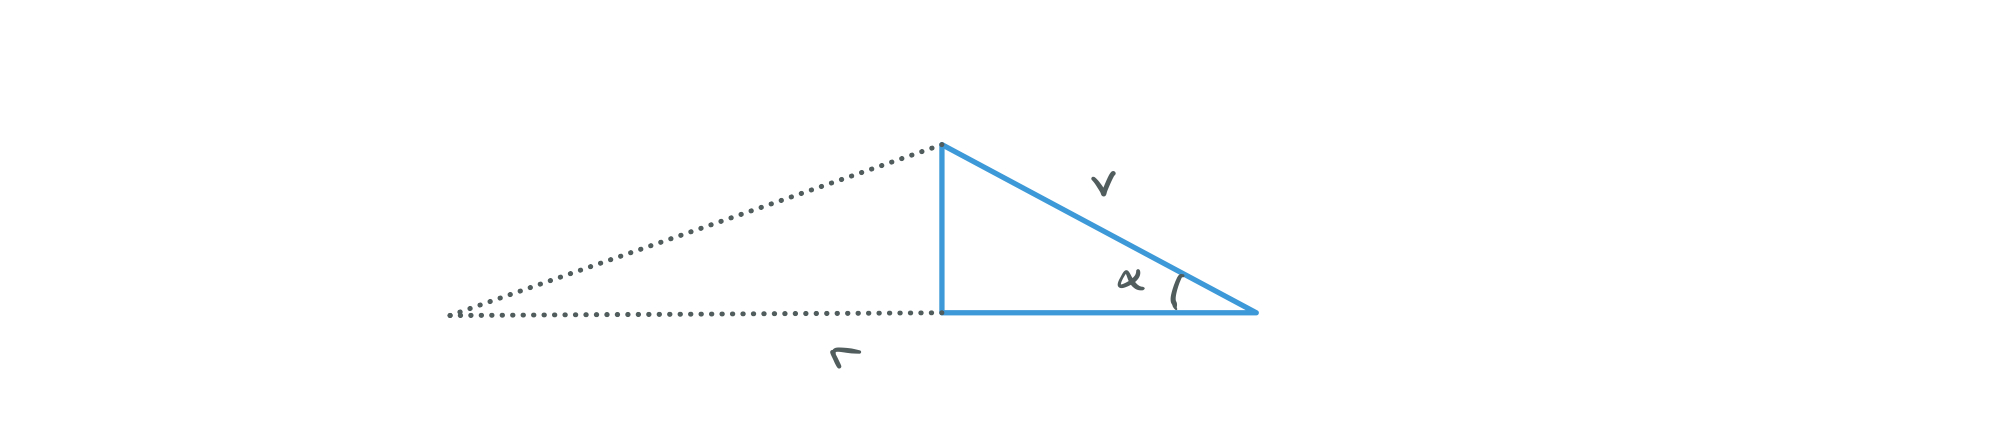

ii) What we're working towards is to determine if each ray goes to infinity or hits the event horizon and where. We're going to do this by taking advantage of `solve_ivp`'s ability to tell us about events, we've already used it to stop the simulation at $u = 0$. So let's define another event that fires if the ray hits the event horizon at u = 1, we'll then be able to classify rays into those that escaped and those that were captured by the black hole.

NB: if you pass `events = [f, g]` into `solve_ivp` then the solution will have a field `t_events` where `t_events[0]` contains t values at which $f(t,y) = 0$ and `t_events[1]` at which $g(t,y) = 0$ 

Plot rays for $r = 5$ and $\alpha$ between 0.01 and $\pi$, notice that the rays are evenly spread out now when they emanate from the observer. Use the events to color the rays red or blue depending on if the ray escaped to infinity or hit the horizon.

You'll see that the lines actually overshoot the event horizon and go a little inside, don't worry about this, it's just because of the finite step size. The events actually have more accurate positions than the steps themselves because `solve_ivp` uses numerical root finding under the hood to estimate where $f(t,y) = 0$ even if it happens between steps.

At this point we should stop and think about what this is. We're calculating geodesics emanating from an observer at some point outside the horizon. If we want to interpret what this means about how a black hole looks we have to be careful:

1) When doing raytracing we're assuming the geodesics are reversible, that is: light could follow a path from the surface of the horizon to the observer. You'll have to take my word that this is true in this case, though you can easily see that it isn't true for points inside the event horizon.
2) The other thing to note is that when matter falls into a black hole, light that it emits will appear more and more redshifted until it's essentially invisible. We're not going to account for that here.

That being said, the above plots tell us two things about what black hole look like:

1) The horizon appears larger than it actually is.
2) We are able to see light that is emitted from the back, side and actually all the way around the hole. If you add more rays you'll see there's no limit to how many loops the light rays can make, it just requires more and more tuning of the angle. This means that at the edge of our image of the hole we're going to see a lot of copies of the hole all smushed together. 

### Question 6

Now we're going to move out of this 2D plane into 3D, let's define $\alpha$ as before and also introduce $\beta$ which will measure rotation about the line between the observer and the origin and $\gamma$ which will be the value of $\phi$ when the ray intersected the event horizon.

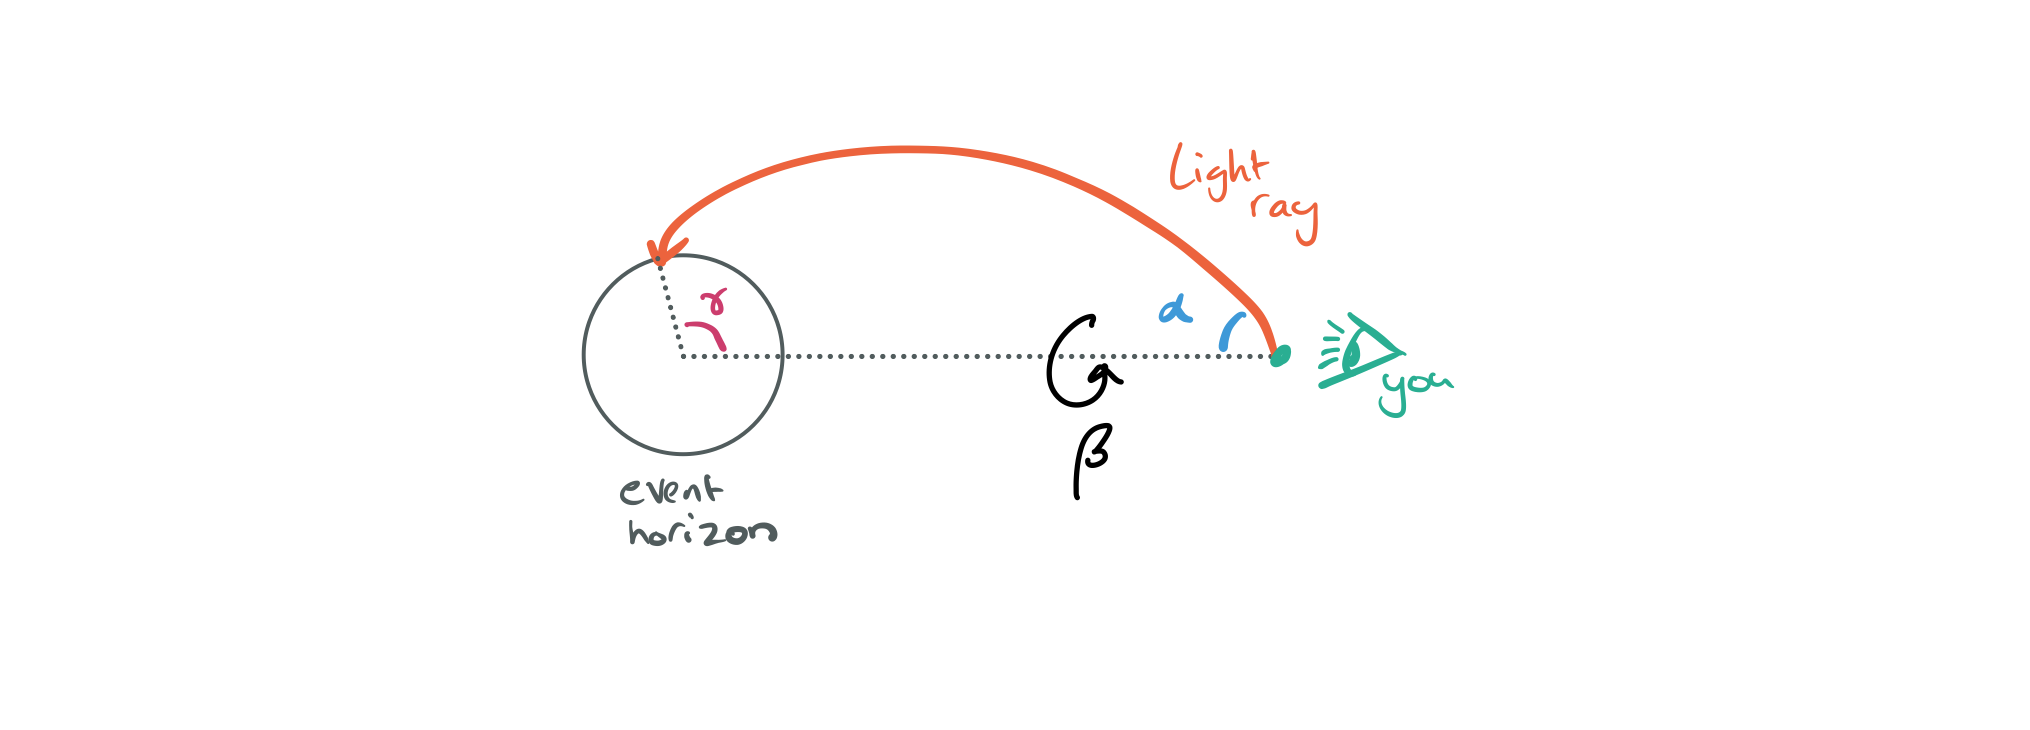

We'll cheat a bit, because of the high symmetry of the (non-rotating) black hole and the fact we're looking at it axially, all we really need to know is $\gamma(\alpha)$, $\beta$ just rotates everything. The rest is just coordinate transorms, incredible tedious ones at that. 

Use your geodesic code to make a lookup table for $\gamma(\alpha)$ with $\alpha$ between 0.01 and $\pi$ for both Schwarzchild $r_s = 1$ and flat $r_s = 0$ spacetime. In principle we could also collect information about the escaped rays but I'll leave that as an exercise for the reader.

From the above we see that the functions are similar when the rays are travelling almost directly towards the centre of the hole but the black hole is visible for a much larger range of $\alpha$ than it would be in flat spacetime (If it were just a sphere rather than a gravitationally massive body).

## Question 7
Now we'll put together the funtion we computed in qustion 6 to render an image of the surface of a black hole as viewed at some distance. To give us some reference we're going to texture the surface of the event horizon with an image of the earth surface, this is terrible unphysical since the earth is not a black hole, it's not emissive, etc etc but it's more interesting that just plotting lines of constant $\phi$ and $\theta$.

We'll take the image below as our convention for how to put coordinates on a sphere though I'll be using radians instead of degrees in the code. 

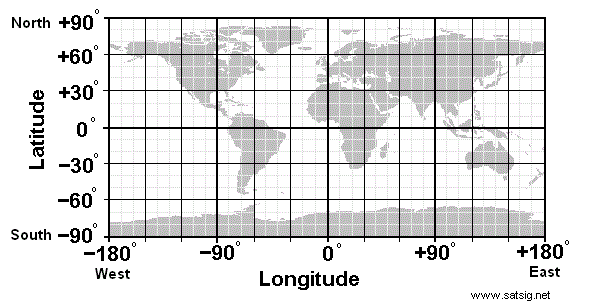

This code is not that interesting to write so I'll just give it to you, we load in an image (which you need to download from [here](https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Blue_Marble_2002.png/2560px-Blue_Marble_2002.png)) and then use an interpolater to get a function that maps lat,lon points to colors
`earth([(lat0,lon0), (lat1,lon1)...]) -> [(r0, g0, b0), (r1, g1, b1)...]`

(1280, 2560, 3)


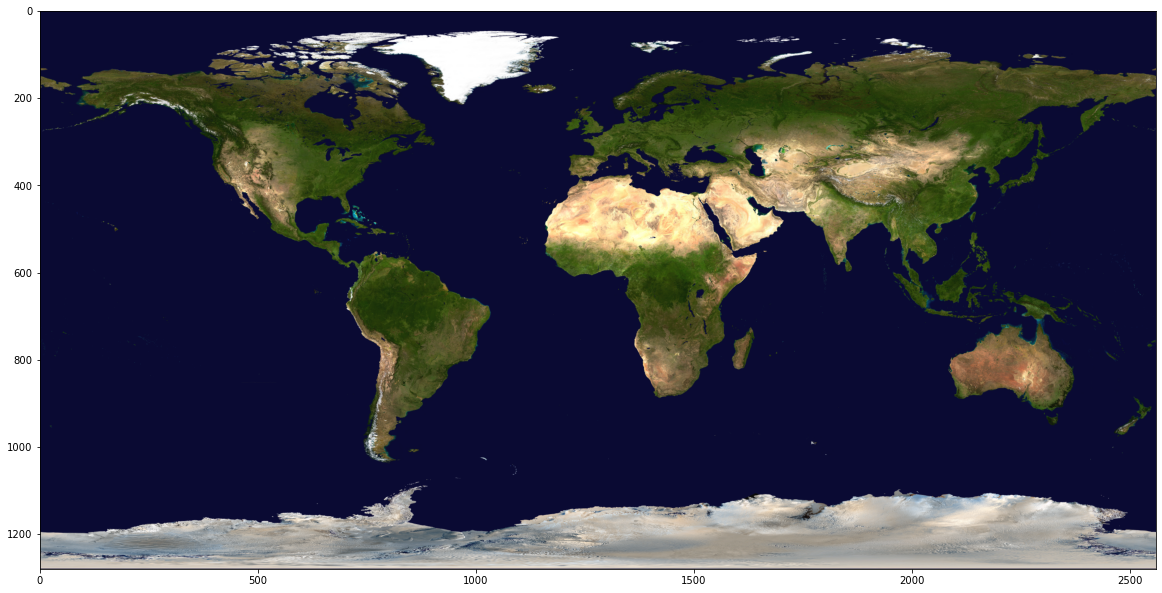

In [6]:
from matplotlib import image
import scipy.interpolate
#get this from https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Blue_Marble_2002.png/2560px-Blue_Marble_2002.png
im = image.imread("./Blue_Marble_2002.png")
print(im.shape)


lat = np.linspace(-pi/2, pi/2, im.shape[0])
lon = np.linspace(-pi, pi, im.shape[1])

latv, lonv = np.meshgrid(lat, lon, sparse=False, indexing='ij')

earth_interp = scipy.interpolate.RegularGridInterpolator([lat, lon], im, bounds_error=False)

def to_points(xv, yv): return np.array([xv, yv]).transpose((1,2,0))
def wrap_lon(phase): return (phase + pi) % (2 * pi) - pi #wraps to the interval -pi, pi
def wrap_lat(phase): return (phase + pi/2) % (pi) - pi / 2 #wraps to the interval -pi/2, pi/2

def earth(lat, lon): 
    points = to_points(wrap_lat(lat), wrap_lon(lon))
    return np.clip(earth_interp(points), 0.0, 1.0)

fig, axes = plt.subplots(figsize = (20,20))
plt.imshow(earth(latv, lonv))

I'm going to walk you through this a little bit because the process of rendering this image is a little fidly and look me a while to get right.

First we want to define the bounds of our image, for want of better names I'll call the coordinates x and y but really they measure the angles of rays hitting our observers eye. We'll choose $2\pi/3$ as the persons maximum field of view.

In [7]:
fov = 2*pi/3 #field of vieew

#define coordinates for our image window
x = np.linspace(-fov/2, fov/2, 500)
y = np.linspace(-fov/2, fov/2, 500)

Next we define a 'mesh' this means that while x and y are just arrays [x0, x1 ...] , xv and yv have two dimensions such that `(xv[i,j], yv[i,j])` is the coordinate of the (i,j) grid point. This allows us to do fast numpy things like `r = np.sqrt(xv**2 + yv**2)` which gives us a variable defined over the image plane equal to the distance from the origin.

In [8]:
xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')

Next we define r and $\phi$ in the image plane. If you look at the diagram from question 6 you should be able to convinve yourself that it makes sense to define $\alpha = r$ and $\beta = \phi$

In [9]:
r = np.sqrt(xv**2 + yv**2) #ranges from 0 to pi/3
phi = np.arctan2(xv, yv) #ranges from -pi to pi
#we map alpha as define above onto r and beta onto phi
alpha = r
beta = phi

Now we actually map alpha onto gamma, here `spacetime` is a function you need to write that maps alpha onto gamma according to the spacetime you're in. You want to interpolate the data you got from question 6. The `pi/2 - spacetime(alpha)`is because we're measuring our azimuthal angles from the equator rather than from the poles. 

In [11]:
def spacetime(x): return x #a dummy function that you need to fill in
gamma = pi/2 - spacetime(alpha)
beta = beta

And finally, just so that we can view the earth from the side rather than only at one of the poles, we'll map to 3D cartesian coordinates, rotate the axes and then map back. Now$(\phi, \theta)$ are the longitude and lattitude on the earth so we can map straight to an image pixel and we're done! 

In [12]:
def polar_to_cart(r, phi, theta):
    """
    Convert a spherical polar coordinate system 
    (r, phi theta) 0 < r, -pi < phi < pi, -pi/2 < theta < pi/2
    into Cartesian x,y,z coordinates
    
    NB:
    Phi measures rotations about the z axis
    Theta is the angle above or below the xy plane
    This is slightly different from the typical definition where theta is the angle with the z axis.
    """
    return r * np.cos(phi) * np.cos(theta), r * np.sin(phi)*np.cos(theta), r * np.sin(theta)

def cart_to_polar(x,y,z):
    """
    Reverse the above transformation.
    Uses the convention that phi ranges from -pi to pi
    and theta ranges from -pi/2 to pi
    """
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arcsin(z / r)
    phi = np.arctan2(y,x)
    return r, phi, theta
    
x,y,z = polar_to_cart(r = 1, phi = beta, theta = gamma)
_, phi, theta = cart_to_polar(x,-z,y)

Can you put all that together to make an image of the surface of the earth if the surface of the earth also happend to be the event horizon of a black hole? (Terms and conditions apply, this can't actually happen, gravitational redshift is ignored etc etc)

I wouldn't blame you for skipping to the solution on this one, it's a bit tricky but the payoff is nice. 